**Regression for Ad-cost**

We will use regression to find out which method of advertisement can maximise our sales. 


In [1]:
#installing packages
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sb
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import os
from collections import Counter
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from pandas import Series;  from numpy.random import randn
from statsmodels.stats.weightstats import ttest_ind
import scipy.stats as stats
from scipy.stats import ttest_ind
import pandas as pd
import numpy as np
import seaborn as sb
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.stats import shapiro
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from datetime import datetime
from datetime import date
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression as lgr
import statsmodels.formula.api as smf
from sklearn import preprocessing as preproc
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn import model_selection
from sklearn.neural_network import MLPRegressor

In [2]:
#bringing the dataset
adsale=pd.read_csv("C:\\Users\\sujoydutta\\Desktop\\Data analysis\\Datasets\\Advertising.csv")

In [3]:
#viewing the dataset
print(adsale.head())

   Sequence number  TV(in K$)  Radio(in K$)  Newspaper((in K$))  Sales(in M$)
0                1      230.1          37.8                69.2          22.1
1                2       44.5          39.3                45.1          10.4
2                3       17.2          45.9                69.3           9.3
3                4      151.5          41.3                58.5          18.5
4                5      180.8          10.8                58.4          12.9


In [4]:
#examining the dataset
adsale.info()
adsale.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sequence number     1000 non-null   int64  
 1   TV(in K$)           941 non-null    float64
 2   Radio(in K$)        955 non-null    float64
 3   Newspaper((in K$))  774 non-null    float64
 4   Sales(in M$)        995 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 39.2 KB


(1000, 5)

In [5]:
#seeing null values
adsale.isnull().sum()

Sequence number         0
TV(in K$)              59
Radio(in K$)           45
Newspaper((in K$))    226
Sales(in M$)            5
dtype: int64

In [6]:
#dropping useless columns
adsale=adsale.drop(['Sequence number'],axis=1)
adsale

,TV(in K$),Radio(in K$),Newspaper((in K$)),Sales(in M$)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
995,71.0,6.0,44.0,NaN
996,116.0,5.0,96.0,NaN
997,178.0,43.0,116.0,NaN
998,223.0,35.0,47.0,NaN


In [7]:
#renaming
adsale.rename(columns={
        "TV(in K$)": "TV",
        "Radio(in K$)": "Radio",
        "Newspaper((in K$))": "Newspaper",
        "Sales(in M$)":"Sales"
        
    }, inplace=True,
    )
adsale.head(0)

,TV,Radio,Newspaper,Sales


In [8]:
#replacing missing values with nan(Not a number) that makes things simpler for python
adsale.replace("?",np.nan,inplace = True)
print(adsale.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         941 non-null    float64
 1   Radio      955 non-null    float64
 2   Newspaper  774 non-null    float64
 3   Sales      995 non-null    float64
dtypes: float64(4)
memory usage: 31.4 KB
None


In [9]:
#dropping null rows of sale 
salenull=adsale[adsale['Sales'].isnull()].index
len(salenull)
adsale.drop(salenull)
print(len(adsale))


1000


In [10]:
salenull
adsale=adsale.drop(salenull,axis=0)
adsale

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
990,141.0,38.0,106.0,8.0
991,75.0,29.0,113.0,10.0
992,175.0,14.0,108.0,6.0
993,83.0,29.0,78.0,23.0


In [11]:
#taking mean values
meantv=adsale['TV'].mean()
meanrd=adsale['Radio'].mean()
meannp=adsale['Newspaper'].mean()

In [12]:
#replacing with mean
adsale['Radio'].replace(np.nan, meanrd, inplace=True)
adsale['Newspaper'].replace(np.nan, meannp, inplace=True)
adsale['TV'].replace(np.nan, meantv, inplace=True)

In [13]:
#summary stats
adsale.describe()

,TV,Radio,Newspaper,Sales
count,995.000000,995.000000,995.000000,995.000000
mean,149.369017,25.562211,69.186736,12.427638
std,61.612509,14.166401,27.626955,6.085928
min,0.700000,0.000000,1.000000,1.600000
25%,100.000000,14.000000,50.000000,7.800000
50%,149.369017,25.562211,69.186736,12.000000
75%,200.000000,38.000000,90.000000,17.000000
max,296.400000,50.000000,120.000000,27.000000


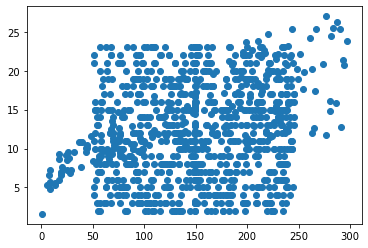

In [14]:
#seeing correlation with target variable-TV

plt.scatter(adsale['TV'], adsale['Sales'])

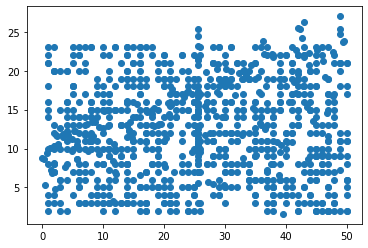

In [15]:
#seeing correlation with target variable-TV

plt.scatter(adsale['Radio'], adsale['Sales'])

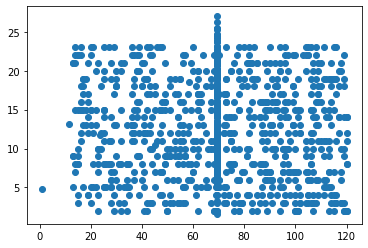

In [16]:
#seeing correlation with target variable-TV

plt.scatter(adsale['Newspaper'],adsale['Sales'])

In [17]:
#correlation co-efficiaent
adsale.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.035400,0.038882,0.212642
Radio,0.035400,1.000000,0.017943,0.065069
Newspaper,0.038882,0.017943,1.000000,-0.039386
Sales,0.212642,0.065069,-0.039386,1.000000


C:\Users\sujoydutta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Newspaper'>

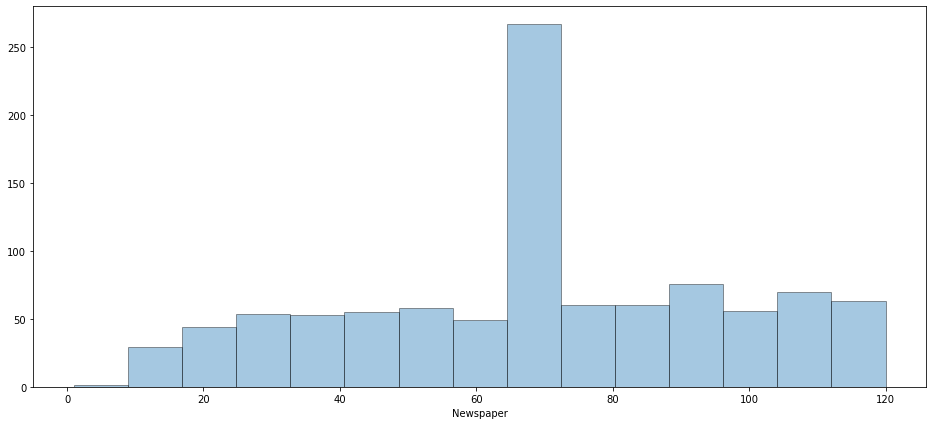

In [18]:
#checking distribution of newspaper
plt.figure(figsize=(16,7))
sb.distplot(adsale['Newspaper'], kde = False,hist_kws=dict(edgecolor="k"))

<AxesSubplot:xlabel='Sales'>

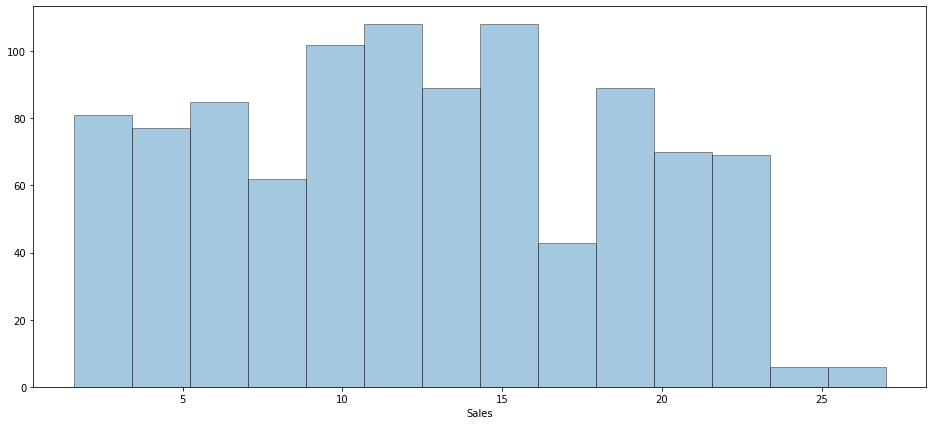

In [19]:
#checking distribution of sales
plt.figure(figsize=(16,7))
sb.distplot(adsale['Sales'], kde = False,hist_kws=dict(edgecolor="k"))

<AxesSubplot:xlabel='TV'>

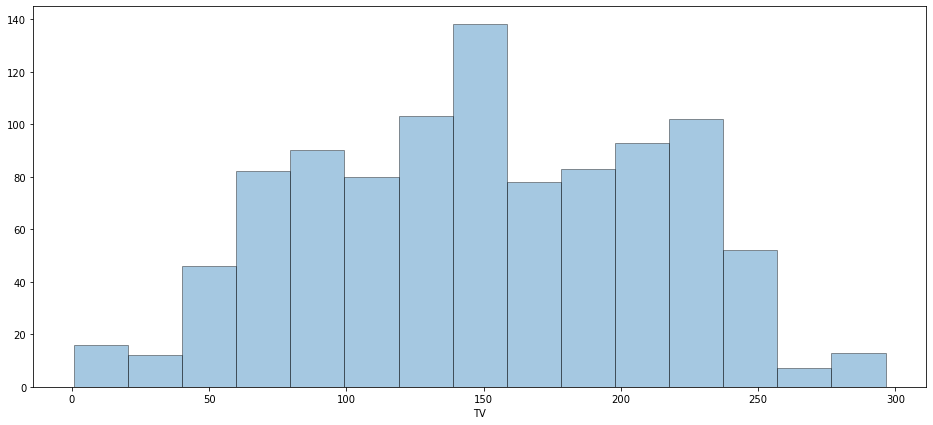

In [20]:
#checking distribution of TV
plt.figure(figsize=(16,7))
sb.distplot(adsale['TV'], kde = False,hist_kws=dict(edgecolor="k"))

<AxesSubplot:xlabel='Radio'>

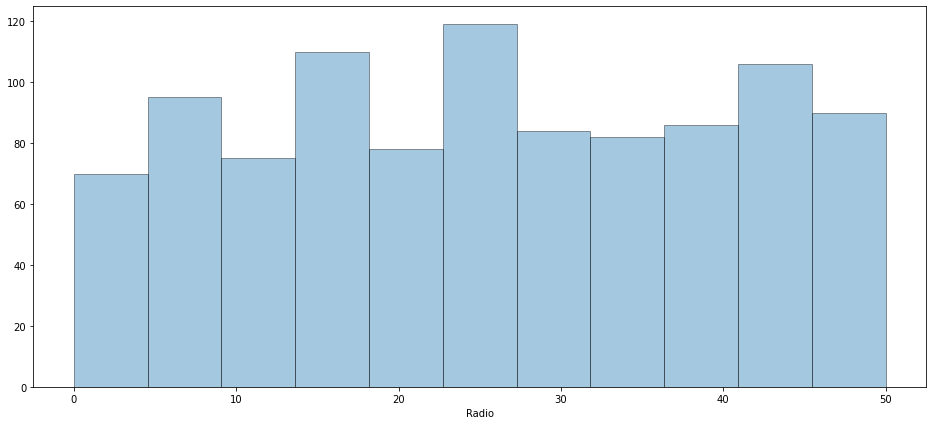

In [21]:
#for radio we see distribution
plt.figure(figsize=(16,7))
sb.distplot(adsale['Radio'], kde = False,hist_kws=dict(edgecolor="k"))

In [22]:
#using log to fix distribution
adsale['Radio']=np.sqrt(adsale['Radio'])
adsale['Sales']=np.sqrt(adsale['Sales'])
adsale['Newspaper']=np.sqrt(adsale['Newspaper'])

<AxesSubplot:xlabel='Radio'>

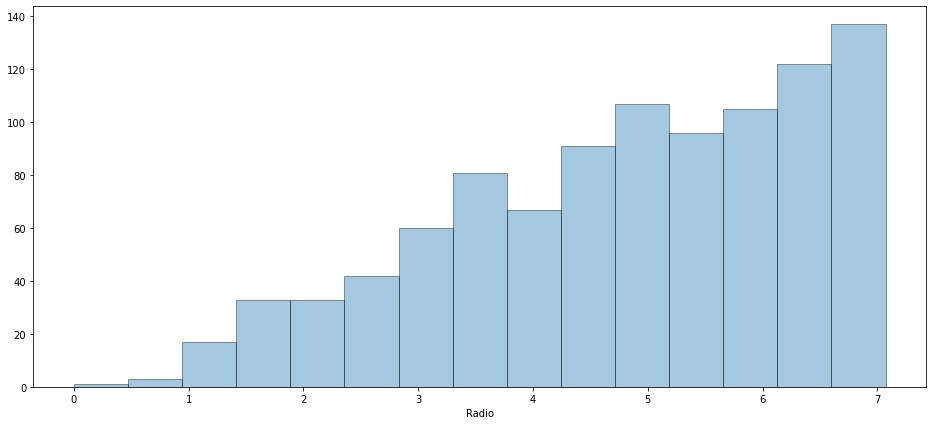

In [23]:
#for radio we see new distribution
plt.figure(figsize=(16,7))
sb.distplot(adsale['Radio'], kde = False,hist_kws=dict(edgecolor="k"))

<AxesSubplot:xlabel='Newspaper'>

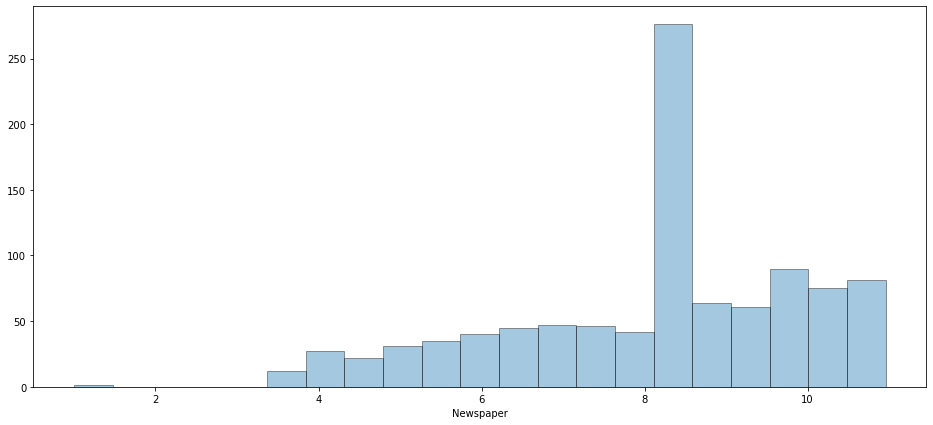

In [24]:
#for Newspaper we see distribution
plt.figure(figsize=(16,7))
sb.distplot(adsale['Newspaper'], kde = False,hist_kws=dict(edgecolor="k"))

<AxesSubplot:xlabel='Sales'>

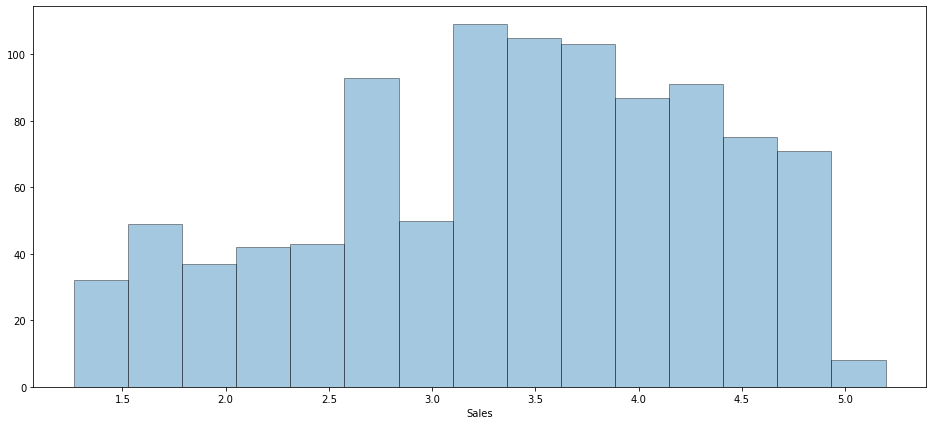

In [25]:
#for TV we see new distribution
plt.figure(figsize=(16,7))
sb.distplot(adsale['Sales'], kde = False,hist_kws=dict(edgecolor="k"))

In [26]:
#linear regression setting x as TV,y
X=pd.DataFrame(adsale.TV)
y=adsale.Sales

In [27]:
#linear regression initialize and fit
lm=LinearRegression()
lm.fit(X,y)

LinearRegression()

In [28]:
#print co ef and intercept
print(lm.intercept_)
print(lm.coef_)

2.9547437247141075
[0.00298141]


In [29]:
#predict
X_new= pd.DataFrame({'TV':[adsale.TV.min(),adsale.TV.max()]})
print(X_new.head())
#model predict
print(lm.predict(X_new))

      TV
0    0.7
1  296.4
[2.95683071 3.83843453]


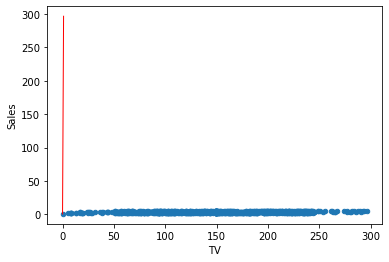

In [30]:
#plot 
adsale.plot(kind='scatter', x='TV',y='Sales')
plt.plot(X_new, c='red', linewidth=1)

In [31]:
#interval
lm = smf.ols(formula='Sales~TV', data=adsale).fit()
lm.conf_int()

,0,1
Intercept,2.805590,3.103897
TV,0.002058,0.003905


In [32]:
#values
print(lm.pvalues)
print(lm.rsquared)

Intercept    1.140722e-201
TV            3.537902e-10
dtype: float64
0.03887408646553103


In [33]:
#linear regression setting x as Radio,y
X=pd.DataFrame(adsale.Radio)
y=adsale.Sales

In [34]:
#linear regression initialize and fit
lm=LinearRegression()
lm.fit(X,y)

LinearRegression()

In [35]:
#print co ef and intercept
print(lm.intercept_)
print(lm.coef_)

3.239388280409597
[0.03348846]


In [36]:
#predict
X_new= pd.DataFrame({'Radio':[adsale.Radio.min(),adsale.Radio.max()]})
print(X_new.head())
#model predict
print(lm.predict(X_new))

      Radio
0  0.000000
1  7.071068
[3.23938828 3.47618747]


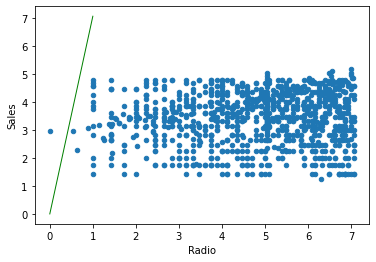

In [37]:
#plot 
adsale.plot(kind='scatter', x='Radio',y='Sales')
plt.plot(X_new, c='green', linewidth=1)

In [38]:
#interval
lm = smf.ols(formula='Sales~Radio', data=adsale).fit()
lm.conf_int()

,0,1
Intercept,3.055691,3.423085
Radio,-0.002845,0.069822


In [39]:
#values
print(lm.pvalues)
print(lm.rsquared)

Intercept    8.697907e-173
Radio         7.079794e-02
dtype: float64
0.0032836867914816104


In [40]:
#linear regression setting x as Newspaper,y
X=pd.DataFrame(adsale.Newspaper)
y=adsale.Sales

In [41]:
#linear regression initialize and fit
lm=LinearRegression()
lm.fit(X,y)

LinearRegression()

In [42]:
#print co ef and intercept
print(lm.intercept_)
print(lm.coef_)

3.5711479655194394
[-0.0210757]


In [43]:
#predict
X_new= pd.DataFrame({'Newspaper':[adsale.Newspaper.min(),adsale.Newspaper.max()]})
print(X_new.head())
#model predict
print(lm.predict(X_new))

   Newspaper
0   1.000000
1  10.954451
[3.55007226 3.3402752 ]


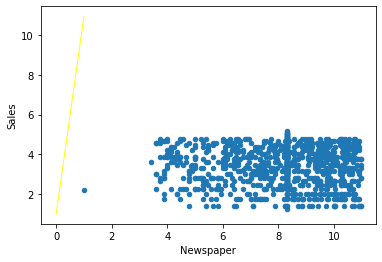

In [44]:
#plot 
adsale.plot(kind='scatter', x='Newspaper',y='Sales')
plt.plot(X_new, c='yellow', linewidth=1)

In [45]:
#interval
lm = smf.ols(formula='Sales~Newspaper', data=adsale).fit()
lm.conf_int()

,0,1
Intercept,3.305830,3.836466
Newspaper,-0.052973,0.010822


In [46]:
#values
print(lm.pvalues)
print(lm.rsquared)

Intercept    7.104727e-117
Newspaper     1.950716e-01
dtype: float64
0.001690149765232185


In [47]:
#using all variables 
feature=['TV','Radio','Newspaper']
X=adsale[feature]
y=adsale.Sales

In [48]:
#train test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size =0.25, random_state=0)

In [49]:
#linear regression initialize and fit
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [50]:
#print co ef and intercept
print(lm.intercept_)
print(lm.coef_)

3.0771358571698704
[ 0.00320215  0.00817566 -0.02249184]


In [51]:
#predict
ypred=lm.predict(X_test)
ypred

array([3.58079517, 3.37324933, 3.29290989, 3.67771502, 3.68592126,
       3.67226574, 3.36356575, 3.71746293, 3.3576348 , 3.66693113,
       3.51839817, 3.19971158, 2.93717085, 3.61999887, 3.39530112,
       3.11342238, 3.09770254, 3.52445638, 3.12913741, 3.5905048 ,
       3.30994647, 3.70022316, 3.42648168, 3.49208352, 3.52564245,
       3.14350328, 3.52205684, 3.55033126, 3.51065842, 3.28425183,
       3.63822633, 3.28747269, 3.58442199, 3.42182449, 3.43436027,
       3.43040728, 3.40609016, 3.45226565, 3.1835859 , 3.32646927,
       3.32486103, 3.62998474, 3.41349837, 3.632308  , 3.31955691,
       3.26073327, 3.42697226, 3.22629979, 3.40642047, 3.44081315,
       3.53222526, 3.28504121, 3.31103191, 3.51031602, 3.72156534,
       3.13322855, 3.69747494, 3.50066533, 3.63926331, 3.75732397,
       3.07098285, 3.25747387, 3.0933286 , 3.42838484, 3.40111321,
       3.38692741, 3.83389802, 3.6512351 , 3.2044975 , 3.64323336,
       3.48628829, 3.34952773, 3.38737895, 3.44957611, 3.46459

In [52]:
#mse
print(np.sqrt(mean_squared_error(y_test,ypred)))

0.9394402067898802


In [53]:
#interval
lm = smf.ols(formula='Sales~TV+ Radio+Newspaper', data=adsale).fit()
print(lm.conf_int())
print(lm.summary())

                  0         1
Intercept  2.698538  3.360343
TV         0.002056  0.003904
Radio     -0.007258  0.064082
Newspaper -0.057256  0.005313
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     15.10
Date:                Fri, 02 Dec 2022   Prob (F-statistic):           1.29e-09
Time:                        18:02:07   Log-Likelihood:                -1318.7
No. Observations:                 995   AIC:                             2645.
Df Residuals:                     991   BIC:                             2665.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      

In [90]:
#using random seed to create a dummy variable
np.random.seed(123)
nums=np.random.rand(len(adsale))
mask_large = nums>0.5
adsale['size'] ='small'
adsale.loc[mask_large,'size'] = 'large'
adsale

,TV,Radio,Newspaper,Sales,size,islarge
0,230.1,6.148170,8.318654,4.701064,large,1
1,44.5,6.268971,6.715653,3.224903,small,0
2,17.2,6.774954,8.324662,3.049590,small,0
3,151.5,6.426508,7.648529,4.301163,large,1
4,180.8,3.286335,7.641989,3.591657,large,1
...,...,...,...,...,...,...
990,141.0,6.164414,10.295630,2.828427,small,0
991,75.0,5.385165,10.630146,3.162278,small,0
992,175.0,3.741657,10.392305,2.449490,large,1
993,83.0,5.385165,8.831761,4.795832,small,0


In [91]:
#giving dummy variables for size
adsale['islarge'] = np.where(adsale['size']== 'large', '1', '0')

In [93]:
#using random seed to create a dummy variable
np.random.seed(123)
nums=np.random.rand(len(adsale))
mask_suburban= (nums>0.33) & (nums<0.66) 
mask_urban = nums>0.5
adsale['Area'] ='rural'
adsale.loc[mask_suburban,'Area'] = 'suburban'
adsale.loc[mask_urban,'Area'] = 'urban'
adsale.head()

,TV,Radio,Newspaper,Sales,size,islarge,Area
0,230.1,6.148170,8.318654,4.701064,large,1,urban
1,44.5,6.268971,6.715653,3.224903,small,0,rural
2,17.2,6.774954,8.324662,3.049590,small,0,rural
3,151.5,6.426508,7.648529,4.301163,large,1,urban
4,180.8,3.286335,7.641989,3.591657,large,1,urban


In [ ]:
#giving dummy variables for size
adsale['islarge'] = np.where(adsale['size']== 'large', '1', '0')

In [100]:
#making dummy variables for area
area_dummies=pd.get_dummies(adsale.Area, prefix= 'Area').iloc[:,1:]
adsale=pd.concat([adsale,area_dummies],axis=1)
adsale.head()

,TV,Radio,Newspaper,Sales,size,islarge,Area,Area_suburban,Area_urban
0,230.1,6.148170,8.318654,4.701064,large,1,urban,0,1
1,44.5,6.268971,6.715653,3.224903,small,0,rural,0,0
2,17.2,6.774954,8.324662,3.049590,small,0,rural,0,0
3,151.5,6.426508,7.648529,4.301163,large,1,urban,0,1
4,180.8,3.286335,7.641989,3.591657,large,1,urban,0,1


In [102]:
#using new variables
feature=['TV','Radio','Newspaper','islarge','Area_suburban','Area_urban']
X=adsale[feature]
y=adsale.Sales

In [114]:
#train test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size =0.3, random_state=0)

In [115]:
#linear regression initialize and fit
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [116]:
#print co ef and intercept
print(lm.intercept_)
print(feature, lm.coef_)

3.068089145888778
['TV', 'Radio', 'Newspaper', 'islarge', 'Area_suburban', 'Area_urban'] [ 0.00337013  0.01048921 -0.02784318  0.01628021  0.02190704  0.01628021]


In [117]:
#predict
ypred=lm.predict(X_test)
ypred

array([3.5993502 , 3.35030032, 3.29192069, 3.69769721, 3.72179704,
       3.7011474 , 3.33438056, 3.72608545, 3.36039942, 3.69135773,
       3.49440719, 3.18835382, 2.91983668, 3.60765227, 3.40303814,
       3.09707504, 3.07671937, 3.53871331, 3.13474714, 3.60640851,
       3.29911755, 3.69869403, 3.44947066, 3.47963566, 3.5132426 ,
       3.13582222, 3.49795352, 3.57008786, 3.52283779, 3.28442958,
       3.67514297, 3.25551879, 3.5805358 , 3.40643874, 3.44031438,
       3.4640679 , 3.40633693, 3.44681191, 3.19712792, 3.34187485,
       3.30212394, 3.65376255, 3.42107077, 3.65091314, 3.2985912 ,
       3.25479851, 3.42869927, 3.23616049, 3.43759131, 3.42260315,
       3.53808012, 3.31325149, 3.27974197, 3.48348877, 3.75070337,
       3.13052752, 3.72950787, 3.53649164, 3.68223487, 3.80197967,
       3.05678272, 3.26810902, 3.05539576, 3.43924263, 3.42222363,
       3.3973538 , 3.8430318 , 3.63520257, 3.18425724, 3.67260569,
       3.50268529, 3.32786552, 3.4140115 , 3.42456395, 3.47827

In [121]:
#mse
print(np.sqrt(mean_squared_error(y_test,ypred)))

0.9339507346605983
